## France Metro Station Ticket Data

In [8]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [119]:
# paris_2022_1_csv_path = '../data/2022_S1_NB_FER.txt'
# df_raw_1 = pd.read_csv(paris_2022_1_csv_path, delimiter='\t')
# df_raw_1['JOUR'] = pd.to_datetime(df_raw_1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')
# # df_raw_1[df_raw_1["LIBELLE_ARRET"].str.contains("D'AUTEUIL")]["LIBELLE_ARRET"].unique()

# paris_2022_2_csv_path = '../data/2022_S2_NB_FER.txt'
# df_raw_2 = pd.read_csv(paris_2022_2_csv_path, delimiter=';')
# df_raw_2['JOUR'] = pd.to_datetime(df_raw_2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

In [125]:
paris_2022_1_csv_path = '../data/2022_S1_NB_FER.txt'
df_raw_1 = pd.read_csv(paris_2022_1_csv_path, delimiter='\t')
df_raw_1['JOUR'] = pd.to_datetime(df_raw_1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')
# df_raw_1[df_raw_1["LIBELLE_ARRET"].str.contains("D'AUTEUIL")]["LIBELLE_ARRET"].unique()

paris_2022_2_csv_path = '../data/2022_S2_NB_FER.txt'
df_raw_2 = pd.read_csv(paris_2022_2_csv_path, delimiter=';')
df_raw_2['JOUR'] = pd.to_datetime(df_raw_2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

paris_2023_1_csv_path = '../data/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre.csv'
df_raw_3 = pd.read_csv(paris_2023_1_csv_path, delimiter=';')
df_raw_3['JOUR'] = pd.to_datetime(df_raw_3['JOUR'])

df_raw = pd.concat([df_raw_1, df_raw_2, df_raw_3])
df_raw.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD,lda
0,2022-01-01,100,110,1,PORTE MAILLOT,71379.0,?,21,NaN
1,2022-01-01,100,110,1,PORTE MAILLOT,71379.0,AMETHYSTE,62,NaN
2,2022-01-01,100,110,1,PORTE MAILLOT,71379.0,AUTRE TITRE,275,NaN
3,2022-01-01,100,110,1,PORTE MAILLOT,71379.0,FGT,80,NaN
4,2022-01-01,100,110,1,PORTE MAILLOT,71379.0,IMAGINE R,451,NaN


### Remane columns and value

In [142]:
column_map = {
    "JOUR": "DATE",
    "LIBELLE_ARRET": "STATION",
    "CATEGORIE_TITRE": "TICKET_TYPE",
    "NB_VALD": "COUNT"
}

fares_map = {'NON DEFINI':'normal', 
               'AMETHYSTE':'elderly', 
               'NAVIGO':'normal', 
               'NAVIGO JOUR':'daypass',
               'IMAGINE R':'student',
               'FGT':'subsidized', 
               '?':'normal', 
               'TST':'subsidized',
               'AUTRE TITRE':'normal'}

station_map = {
    "PORTE D'AUTEUIL": "PTE D'AUTEUIL",
    "PTE D'AUTEUIL ": "PTE D'AUTEUIL",
}

df = df_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df["TICKET_TYPE"] = df["TICKET_TYPE"].replace(fares_map)
df["STATION"] = df["STATION"].replace(station_map)
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values(by=['DATE'], inplace=True)
df.dropna(inplace=True)

print('{} dates'.format(len(df["DATE"].unique())))
print('{} stations'.format(len(df["STATION"].unique())))
print('{} ticket types'.format(len(df["TICKET_TYPE"].unique())))
df.head()

546 dates
1399 stations
5 ticket types


,DATE,STATION,TICKET_TYPE,COUNT
0,2022-01-01,PORTE MAILLOT,normal,21
3736,2022-01-01,LONGUEVILLE,subsidized,5
3735,2022-01-01,LONGUEVILLE,elderly,5
3734,2022-01-01,LONGUEVILLE,normal,5
3733,2022-01-01,LIZY-SUR-OURCQ,subsidized,5


In [143]:
df_filter = df[(df['DATE'] >= "2022-01-01") & (df['DATE'] <= "2023-06-30")].groupby(["DATE", "STATION", "TICKET_TYPE"]).sum().reset_index()
df_filter = df_filter.groupby(["DATE", "STATION"]).filter(lambda x: x['TICKET_TYPE'].nunique() > 3)
df_filter = df_filter.groupby(["DATE", "STATION"]).sum().reset_index()
df_filter = df_filter[["DATE", "STATION", "COUNT"]]
df_filter[df_filter['STATION'] == "PTE D'AUTEUIL"].head()

,DATE,STATION,COUNT
493,2022-01-01,PTE D'AUTEUIL,351
1157,2022-01-02,PTE D'AUTEUIL,441
1840,2022-01-03,PTE D'AUTEUIL,984
2529,2022-01-04,PTE D'AUTEUIL,971
3222,2022-01-05,PTE D'AUTEUIL,958


493    2022-01-01
1157   2022-01-02
1840   2022-01-03
2529   2022-01-04
3222   2022-01-05
Name: DATE, dtype: datetime64[ns]


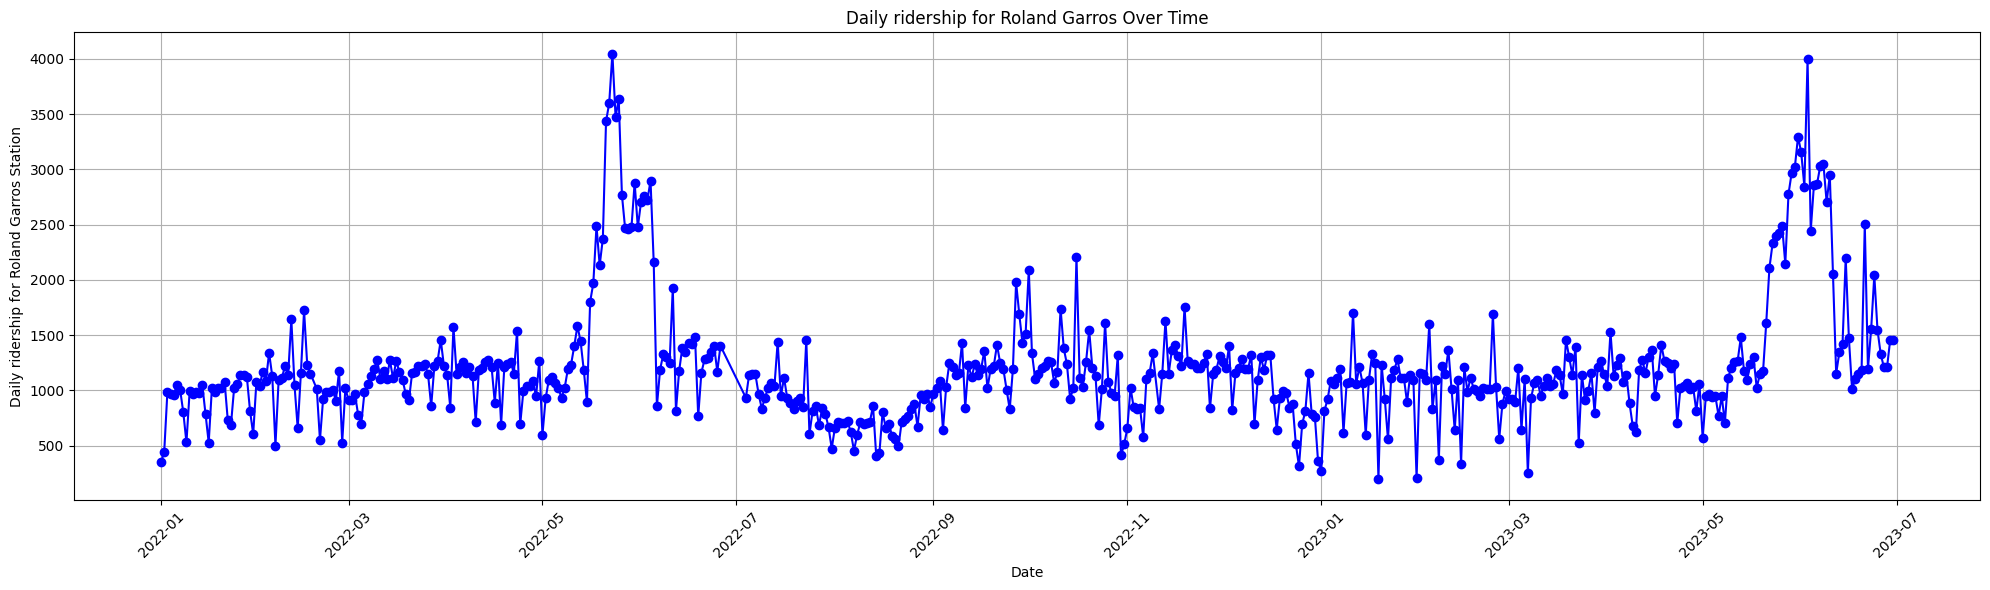

In [262]:
roland_station = df_filter[df_filter['STATION'] == "PTE D'AUTEUIL"]

plt.figure(figsize=(20, 6))
plt.plot(roland_station["DATE"], roland_station["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros Over Time")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

## Data Preprocessing in NYC station data
We aim to analyze US open data which is the place near US Open 2022/2023 and Madison Square Gardon in this data set. After preprocessing, these data will use for train model and predict the number of people in the station.

1. Import data and extract the useful data

In [146]:
nyc_csv_path = '../data/MTA_Subway_Hourly_Ridership__Beginning_February_2022_20231112.csv'
df_nyc_raw = pd.read_csv(nyc_csv_path)
df_nyc_raw.head()

/var/folders/b0/zhkn79px3s13qgx4cnzb2qd40000gn/T/ipykernel_3882/1482948290.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nyc_raw = pd.read_csv(nyc_csv_path)


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid
0,10/14/2022 05:00:00 AM,H007,1 Av (L),M,L,omny,31,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-10-14T05:00:00H0071 Av (L)MLomny
1,11/05/2022 03:00:00 AM,H007,1 Av (L),M,L,omny,78,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-11-05T03:00:00H0071 Av (L)MLomny
2,01/14/2023 03:00:00 PM,H007,1 Av (L),M,L,omny,14,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-01-14T15:00:00H0071 Av (L)MLomny
3,03/23/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-23T03:00:00H0071 Av (L)MLomny
4,06/24/2023 06:00:00 AM,H007,1 Av (L),M,L,omny,44,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-06-24T06:00:00H0071 Av (L)MLomny


In [147]:
nyc_column_map = {
    "transit_timestamp": "DATE",
    "station_complex": "STATION",
    "ridership": "COUNT"
}
df_nyc_raw["transit_timestamp"] = pd.to_datetime(df_nyc_raw["transit_timestamp"]).dt.date
df_nyc = df_nyc_raw[["transit_timestamp", "station_complex", "ridership"]].rename(columns=nyc_column_map)
df_nyc.sort_values(by=['DATE'], inplace=True)
df_nyc = df_nyc.groupby(["DATE", "STATION"]).sum().reset_index()
df_nyc.head()


,DATE,STATION,COUNT
0,2022-02-01,1 Av (L),7256
1,2022-02-01,103 St (1),5021
2,2022-02-01,103 St (6),5711
3,2022-02-01,"103 St (B,C)",1624
4,2022-02-01,103 St-Corona Plaza (7),9450


2. rename station name so that all the ridership count can be group by same station name

In [148]:
station_map = {
    "34 St-Penn Station (1,2,3)": "34 St - Penn Station",
    "28 St (1)": "28 St",
    "Mets-Willets Point (7)": "Mets Willets Point",
    "Flushing-Main St (7)": "Flushing Main St",
    "111 St (7)": "111 St",
    'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)': "42 St - Time Square"
}
# df_nyc[df_nyc['STATION'].str.contains("Time")]["STATION"].unique()
df_nyc.replace(station_map, inplace=True)
df_nyc_filter = df_nyc[df_nyc['STATION'].isin(station_map.values())]
df_nyc_filter = df_nyc_filter.groupby(["DATE", "STATION"]).sum().reset_index()
df_nyc_filter.head()

,DATE,STATION,COUNT
0,2022-02-01,111 St,6032
1,2022-02-01,28 St,4565
2,2022-02-01,34 St - Penn Station,23907
3,2022-02-01,42 St - Time Square,70090
4,2022-02-01,Flushing Main St,23306


3. show figures of Mets Station, 111st station, Flushing station, Penn station and 28st. We can see only

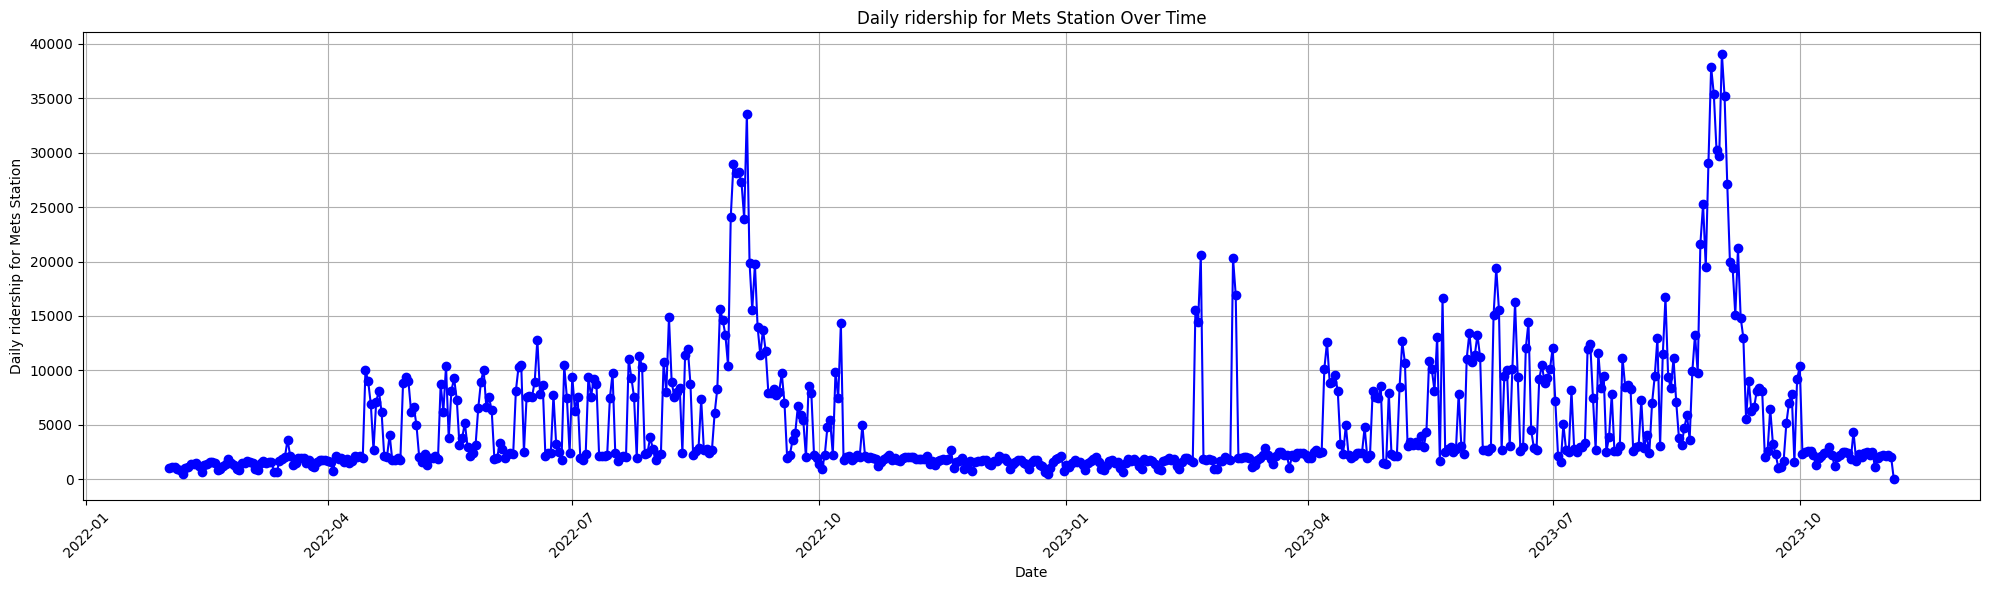

In [149]:
mets_station = df_nyc_filter[df_nyc_filter['STATION'] == "Mets Willets Point"]
plt.figure(figsize=(20, 6))
plt.plot(mets_station["DATE"], mets_station["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Mets Station")
plt.title("Daily ridership for Mets Station Over Time")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

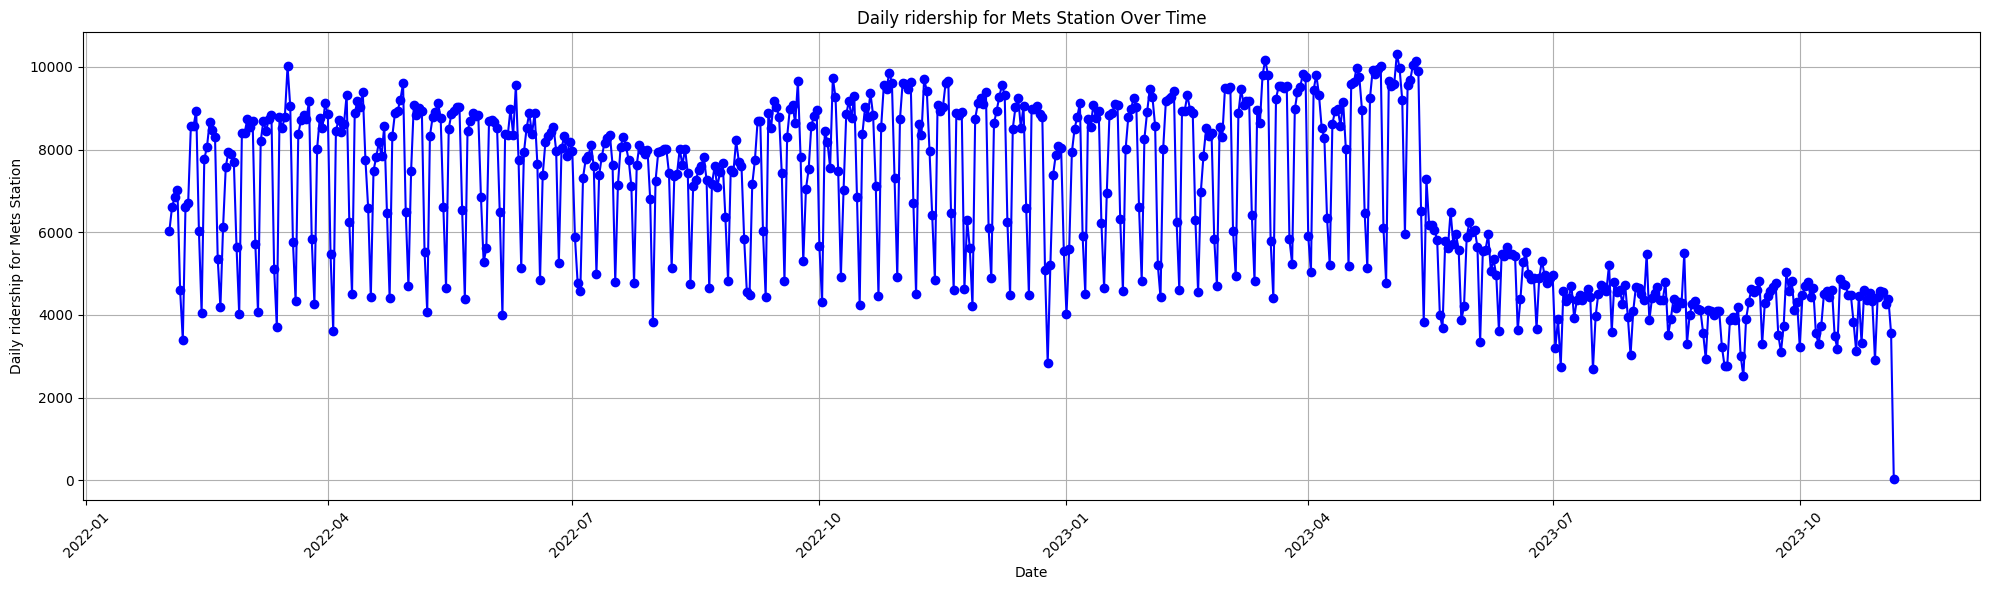

In [150]:
st111_station = df_nyc_filter[df_nyc_filter['STATION'] == "111 St"]
plt.figure(figsize=(20, 6))
plt.plot(st111_station["DATE"], st111_station["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Mets Station")
plt.title("Daily ridership for Mets Station Over Time")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

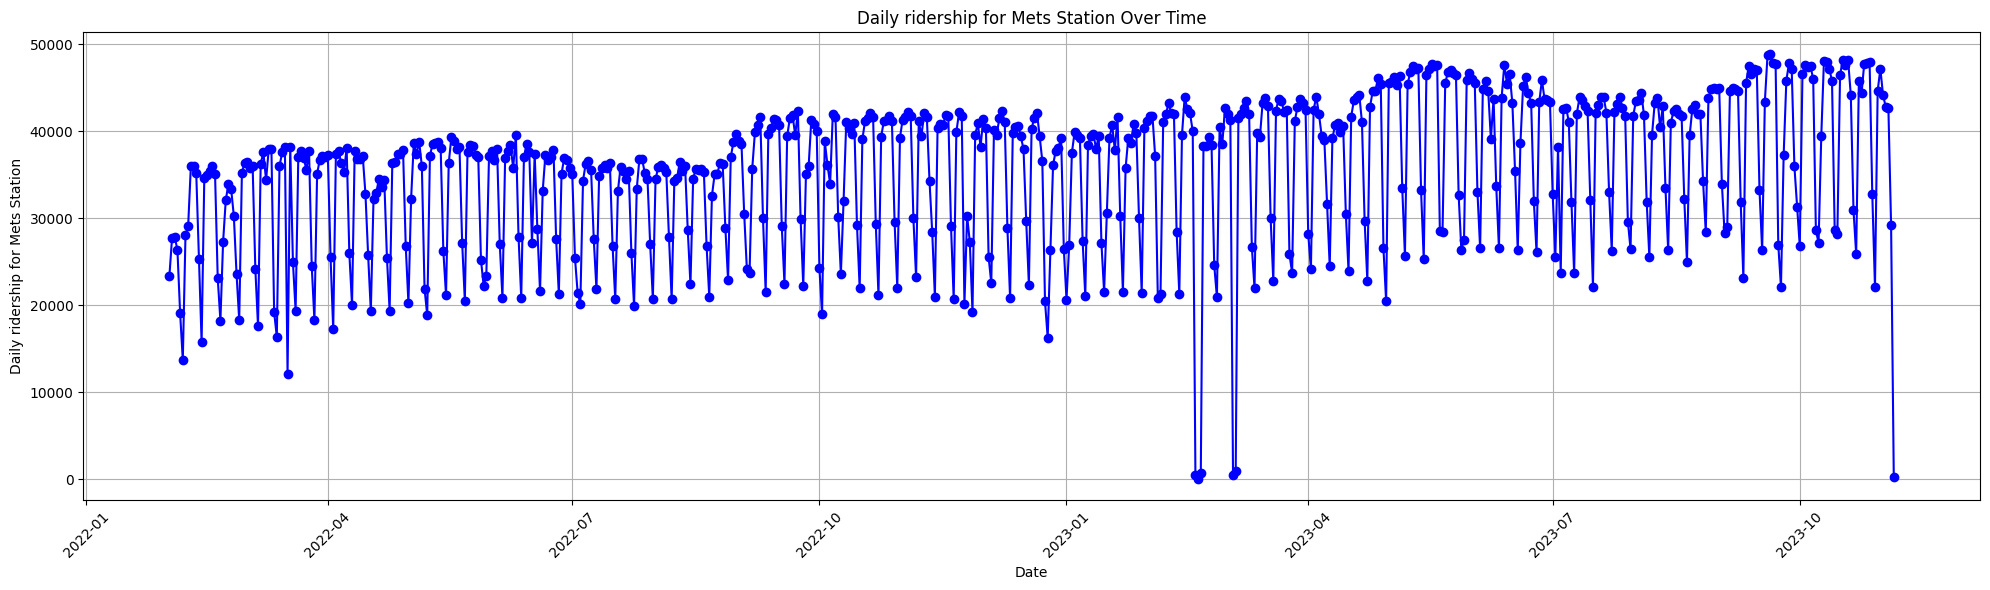

In [151]:
flushing_station = df_nyc_filter[df_nyc_filter['STATION'] == "Flushing Main St"]
plt.figure(figsize=(20, 6))
plt.plot(flushing_station["DATE"], flushing_station["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Mets Station")
plt.title("Daily ridership for Mets Station Over Time")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

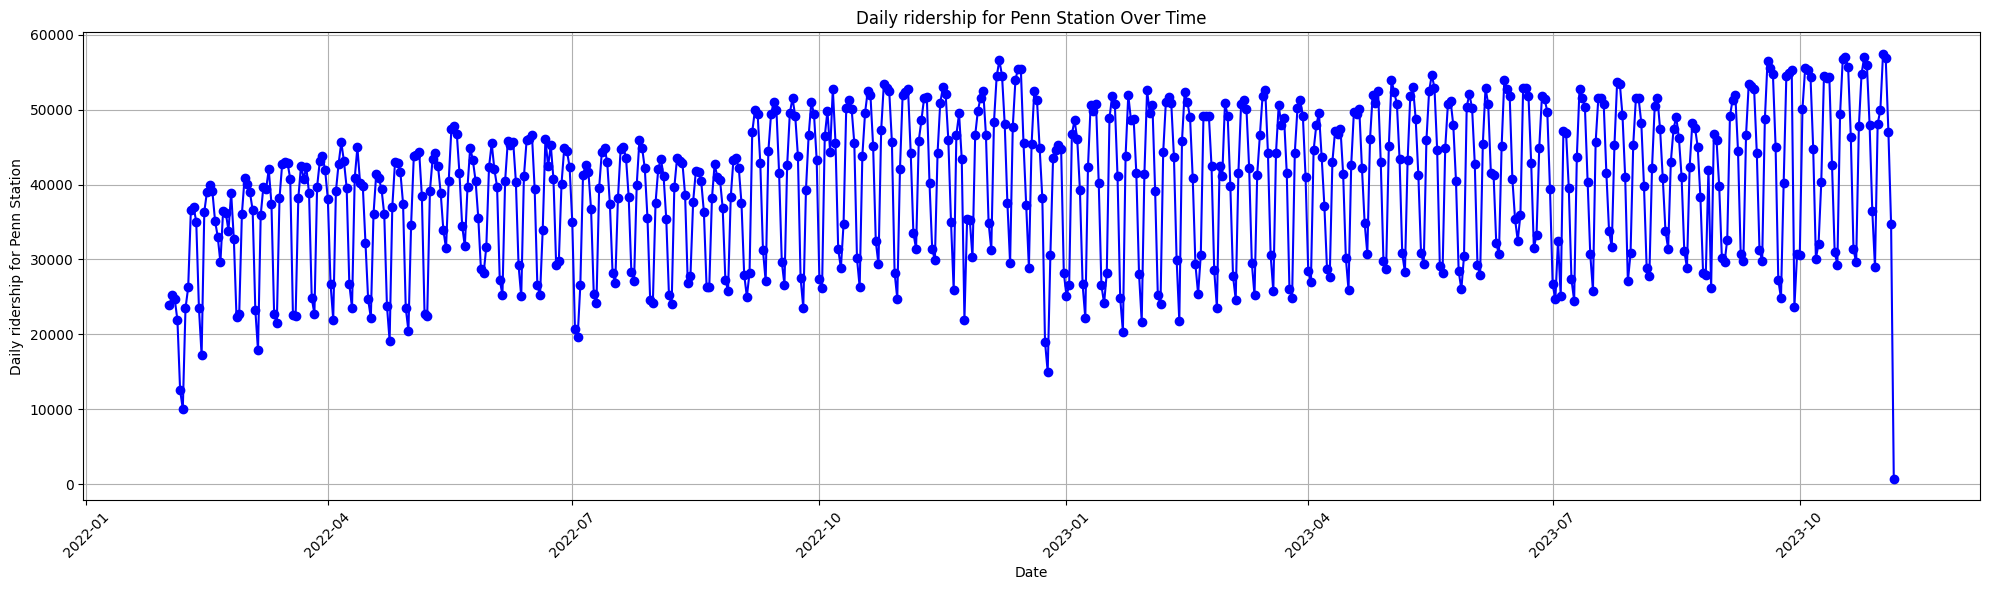

In [152]:
penn_station = df_nyc_filter[df_nyc_filter['STATION'] == "34 St - Penn Station"]
plt.figure(figsize=(20, 6))
plt.plot(penn_station["DATE"], penn_station["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Penn Station")
plt.title("Daily ridership for Penn Station Over Time")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

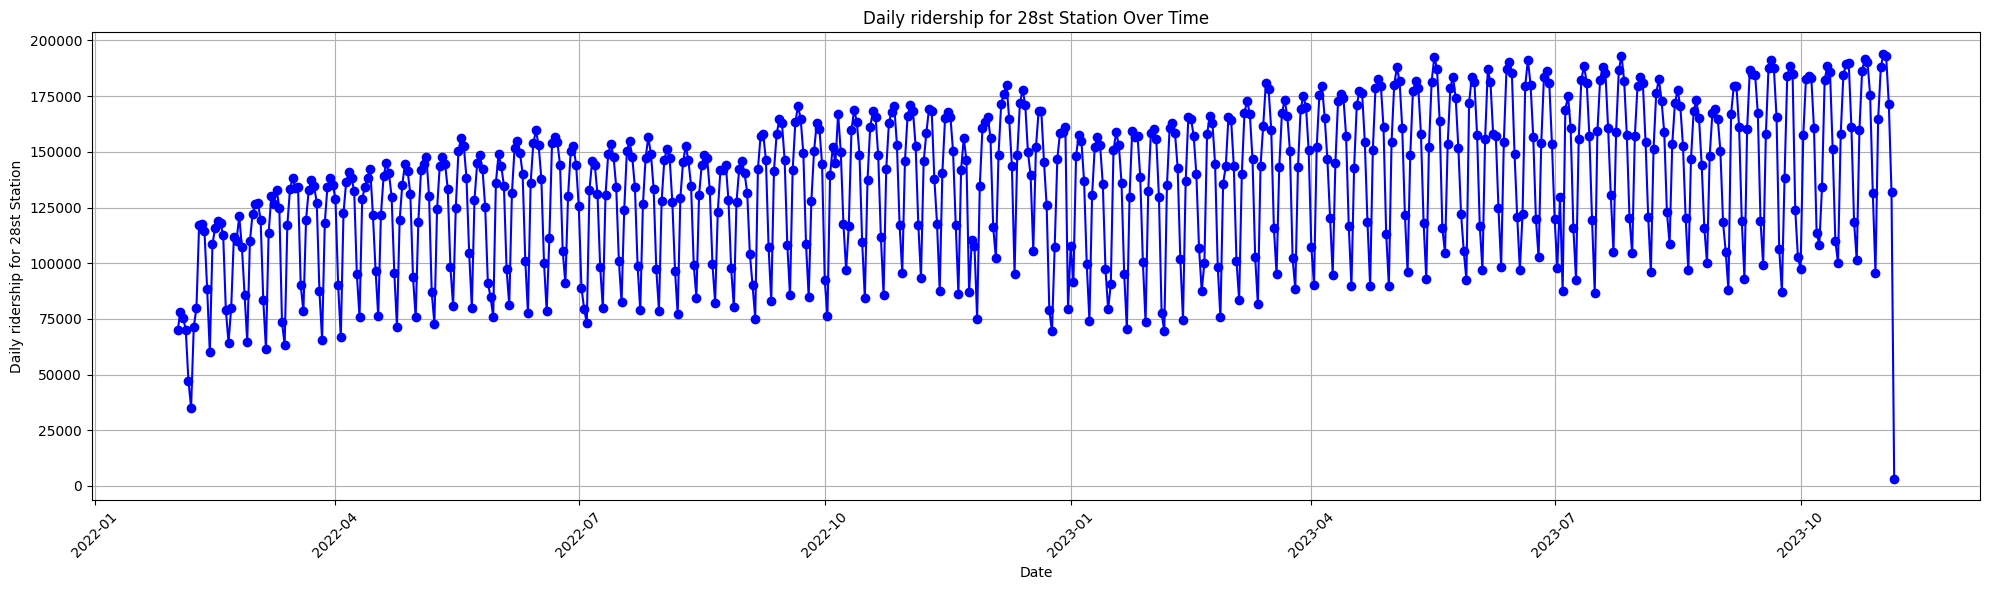

In [153]:
timesq_station = df_nyc_filter[df_nyc_filter['STATION'] == "42 St - Time Square"]
plt.figure(figsize=(20, 6))
plt.plot(timesq_station["DATE"], timesq_station["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for 28st Station")
plt.title("Daily ridership for 28st Station Over Time")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

### Result
From the figure, we can only see in Mets Station where the US Open was hosted has obvious passgenger flow change due to events. Interesting part is that the stations before (111 St) and after (Flushing) Mets Station didn't have the same trend. I assume is that since it only record the tap in data, instead of the total passenger number who pass the station, so that the flow was distributed into different stops. Only the Mets Station recorded the tap data while people leave the US Open, so that the data has obvious change.

In [193]:
df_nyc_filter["DATE"] = pd.to_datetime(df_nyc_filter["DATE"])
us_open_2022 = df_nyc_filter[(df_nyc_filter['DATE'] >= "2022-07-20") & (df_nyc_filter['DATE'] <= "2022-09-15") & (df_nyc_filter['STATION'] == "Mets Willets Point")]
us_open_2023 = df_nyc_filter[(df_nyc_filter['DATE'] >= "2023-08-19") & (df_nyc_filter['DATE'] <= "2023-09-13") & (df_nyc_filter['STATION'] == "Mets Willets Point")]
roland_station_2023 = df_filter[(df_filter['STATION'] == "PTE D'AUTEUIL") & (df_filter['DATE'] >= "2023-05-10") & (df_filter['DATE'] <= "2023-06-30")]
mets_station = df_nyc_filter[df_nyc_filter['STATION'] == "Mets Willets Point"]
roland_station = df_filter[df_filter['STATION'] == "PTE D'AUTEUIL"]


### Start Training
import dependencies

In [194]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

1. data preprocessing, including normalize(scale) data, split train and test data, concate data

In [254]:
time_interval = 5
# us_open_2022_scaler = MinMaxScaler()
# us_open_2022_count = list(us_open_2022["COUNT"])
# us_open_2022_data = [us_open_2022_count[i:i + time_interval] for i in range(len(us_open_2022_count) - time_interval + 1)]
# us_open_2022_shuffle = shuffle(us_open_2022_scaler.fit_transform(us_open_2022_data))
# us_open_2022_shuffle_train = us_open_2022_shuffle[:int(len(us_open_2022_shuffle) * 0.8)]
# us_open_2022_shuffle_test = us_open_2022_shuffle[int(len(us_open_2022_shuffle) * 0.8):]

# us_open_2023_scaler = MinMaxScaler()
# us_open_2023_count = list(us_open_2023["COUNT"])
# us_open_2023_data = [us_open_2023_count[i:i + time_interval] for i in range(len(us_open_2023_count) - time_interval + 1)]
# us_open_2023_shuffle = shuffle(us_open_2023_scaler.fit_transform(us_open_2023_data))
# us_open_2023_shuffle_train = us_open_2023_shuffle[:int(len(us_open_2023_shuffle) * 0.8)]
# us_open_2023_shuffle_test = us_open_2023_shuffle[int(len(us_open_2023_shuffle) * 0.8):]

# roland_station_2023_scaler = MinMaxScaler()
# roland_station_2023_count = list(roland_station_2023["COUNT"])
# roland_station_2023_data = [roland_station_2023_count[i:i + time_interval] for i in range(len(roland_station_2023_count) - time_interval + 1)]
# roland_station_2023_shuffle = shuffle(roland_station_2023_scaler.fit_transform(roland_station_2023_data))
# roland_station_2023_shuffle_train = roland_station_2023_shuffle[:int(len(roland_station_2023_shuffle) * 0.8)]
# roland_station_2023_shuffle_test = roland_station_2023_shuffle[int(len(roland_station_2023_shuffle) * 0.8):]

roland_station_scaler = Normalizer()
roland_station_count = list(roland_station["COUNT"])
roland_station_data = [roland_station_count[i:i + time_interval] for i in range(len(roland_station_count) - time_interval + 1)]
roland_station_shuffle = shuffle(roland_station_scaler.fit_transform(roland_station_data))
roland_station_shuffle_train = roland_station_shuffle[:int(len(roland_station_shuffle) * 0.8)]
roland_station_shuffle_test = roland_station_shuffle[int(len(roland_station_shuffle) * 0.8):]

mets_station_scaler = Normalizer()
mets_station_count = list(mets_station["COUNT"])
mets_station_data = [mets_station_count[i:i + time_interval] for i in range(len(mets_station_count) - time_interval + 1)]
mets_station_shuffle = shuffle(mets_station_scaler.fit_transform(mets_station_data))
mets_station_shuffle_train = mets_station_shuffle[:int(len(mets_station_shuffle) * 0.8)]
mets_station_shuffle_test = mets_station_shuffle[int(len(mets_station_shuffle) * 0.8):]

train_data = []
# train_data.extend(us_open_2022_shuffle_train)
# train_data.extend(us_open_2023_shuffle_train)
# train_data.extend(roland_station_2023_shuffle_train)
train_data.extend(mets_station_shuffle_train)
train_data.extend(roland_station_shuffle_train)
train_data = np.array(shuffle(train_data))
train_data_x, train_data_y = train_data[:, :-1], train_data[:, [-1]]
train_data_x.shape, train_data_y.shape

((937, 4), (937, 1))

In [255]:
model = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model.fit(train_data_x, train_data_y[:, 0])

SVR(C=10, epsilon=0.05, gamma=0.5)

### Train Result
train y data vs train predict data

In [256]:
def mean_absolute_percentage_error(pred, gt):
    pred = np.array(pred).flatten()
    gt = np.array(gt).flatten()
    return (np.absolute(pred - gt) / gt).mean()

0.14045173766943822


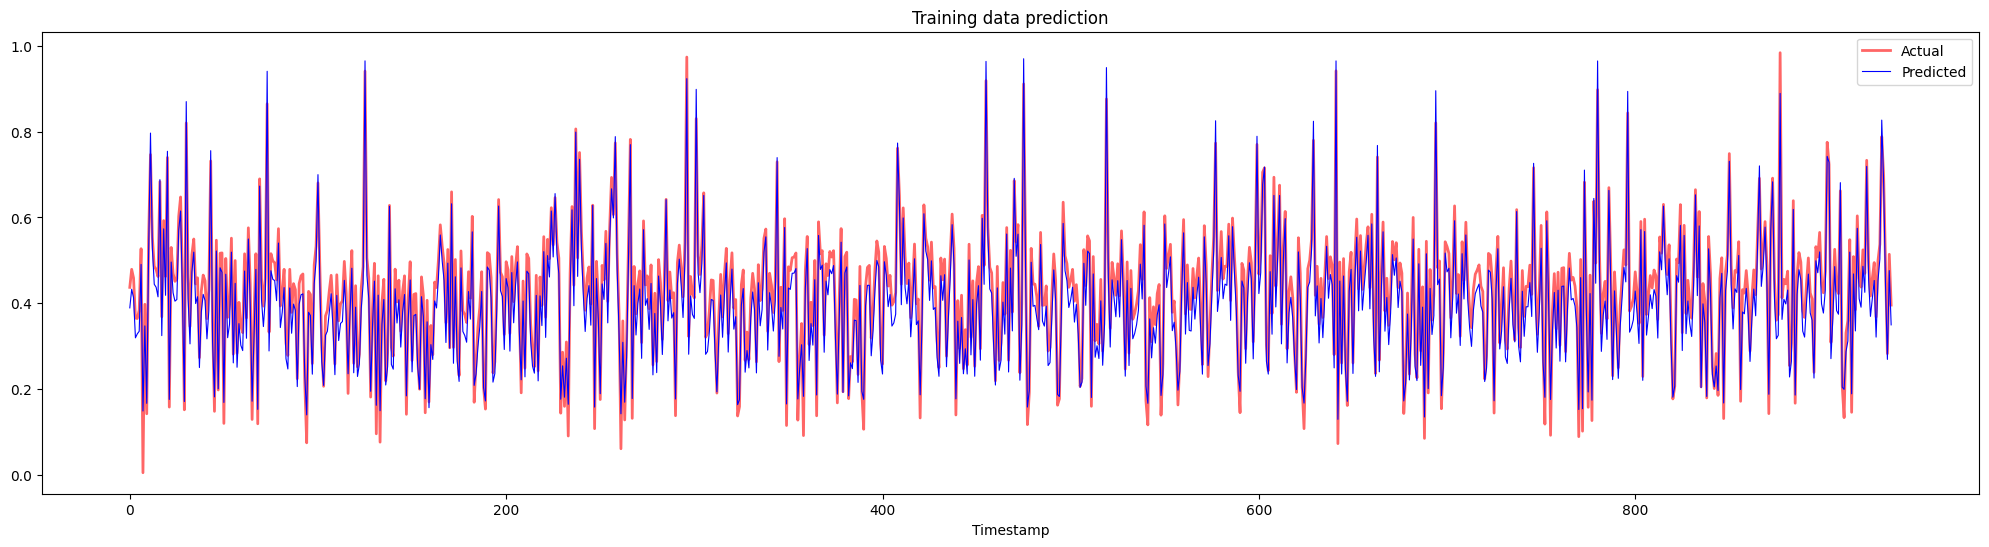

In [257]:
train_data_pred = model.predict(train_data_x).reshape(-1,1)
print(mean_absolute_percentage_error(train_data_pred, train_data_y))
plt.figure(figsize=(25,6))
plt.plot(range(len(train_data_x)), train_data_y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(train_data_x)), train_data_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

0.09778680177227034


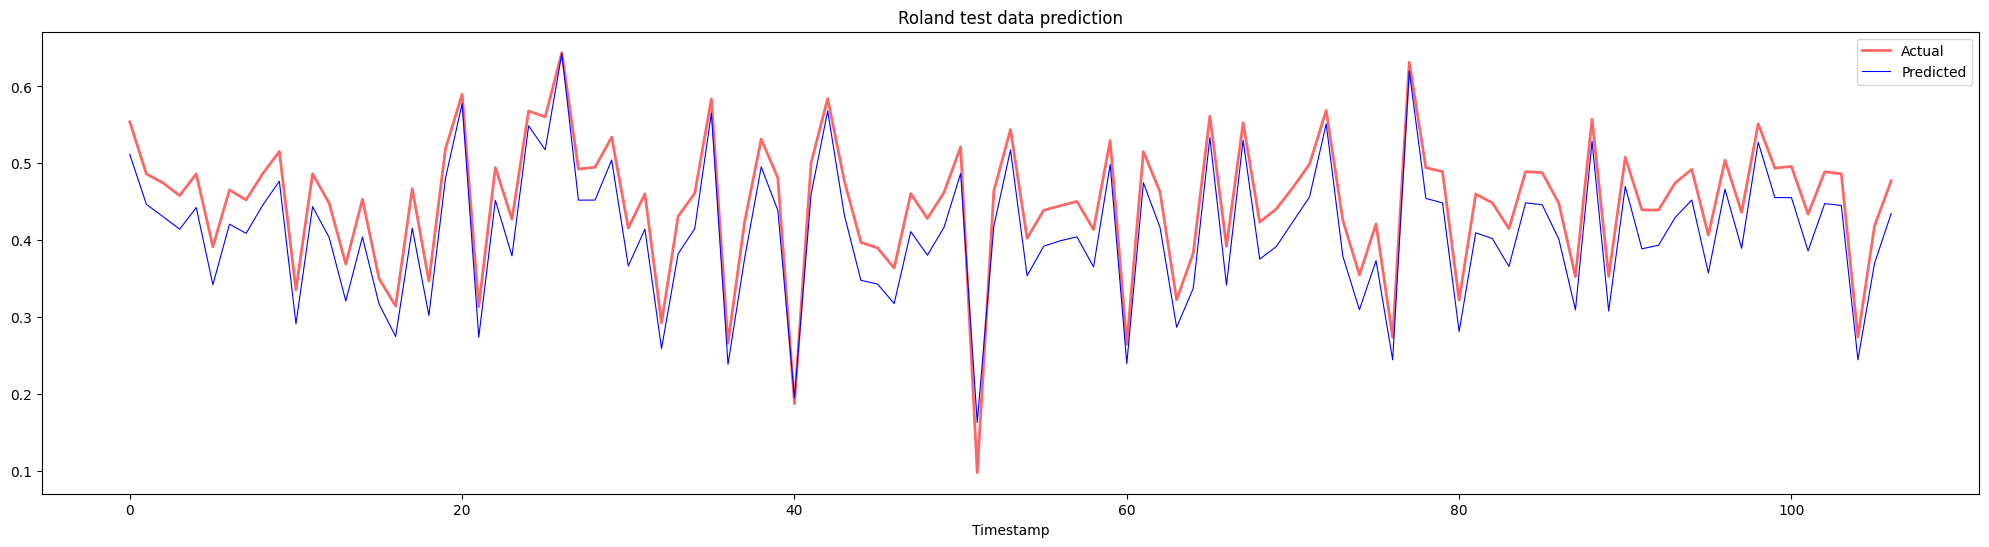

In [258]:
roland_test_x, roland_test_y = roland_station_shuffle_test[:, :-1], roland_station_shuffle_test[:, [-1]]
roland_test_pred = model.predict(roland_test_x).reshape(-1,1)
print(mean_absolute_percentage_error(roland_test_pred, roland_test_y))
plt.figure(figsize=(25,6))
plt.plot(range(len(roland_test_x)), roland_test_y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(roland_test_x)), roland_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Roland test data prediction")
plt.show()

0.15361210372549972


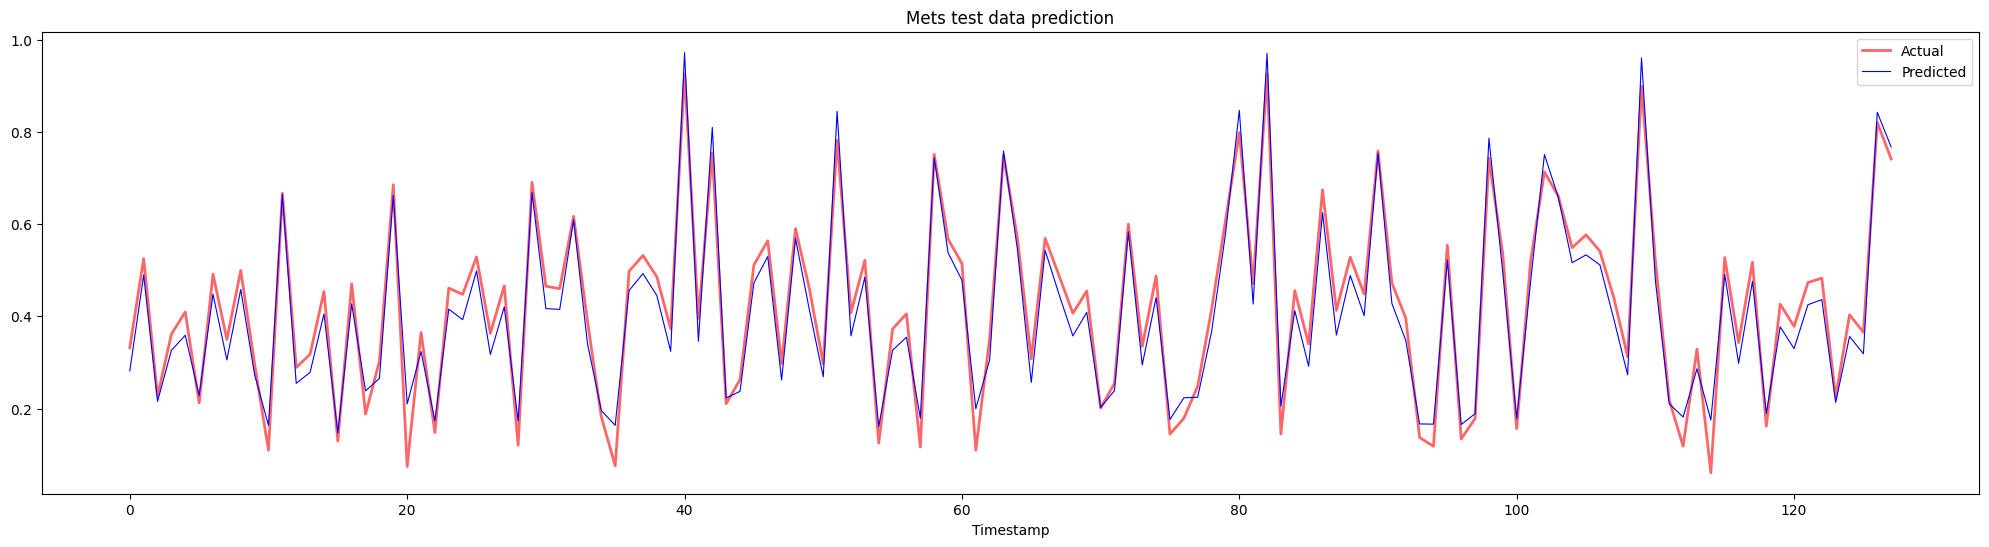

In [259]:
mets_test_x, mets_test_y = mets_station_shuffle_test[:, :-1], mets_station_shuffle_test[:, [-1]]
mets_test_pred = model.predict(mets_test_x).reshape(-1,1)
print(mean_absolute_percentage_error(mets_test_pred, mets_test_y))
plt.figure(figsize=(25,6))
plt.plot(range(len(mets_test_x)), mets_test_y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(mets_test_x)), mets_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Mets test data prediction")
plt.show()

0.11584047081438553


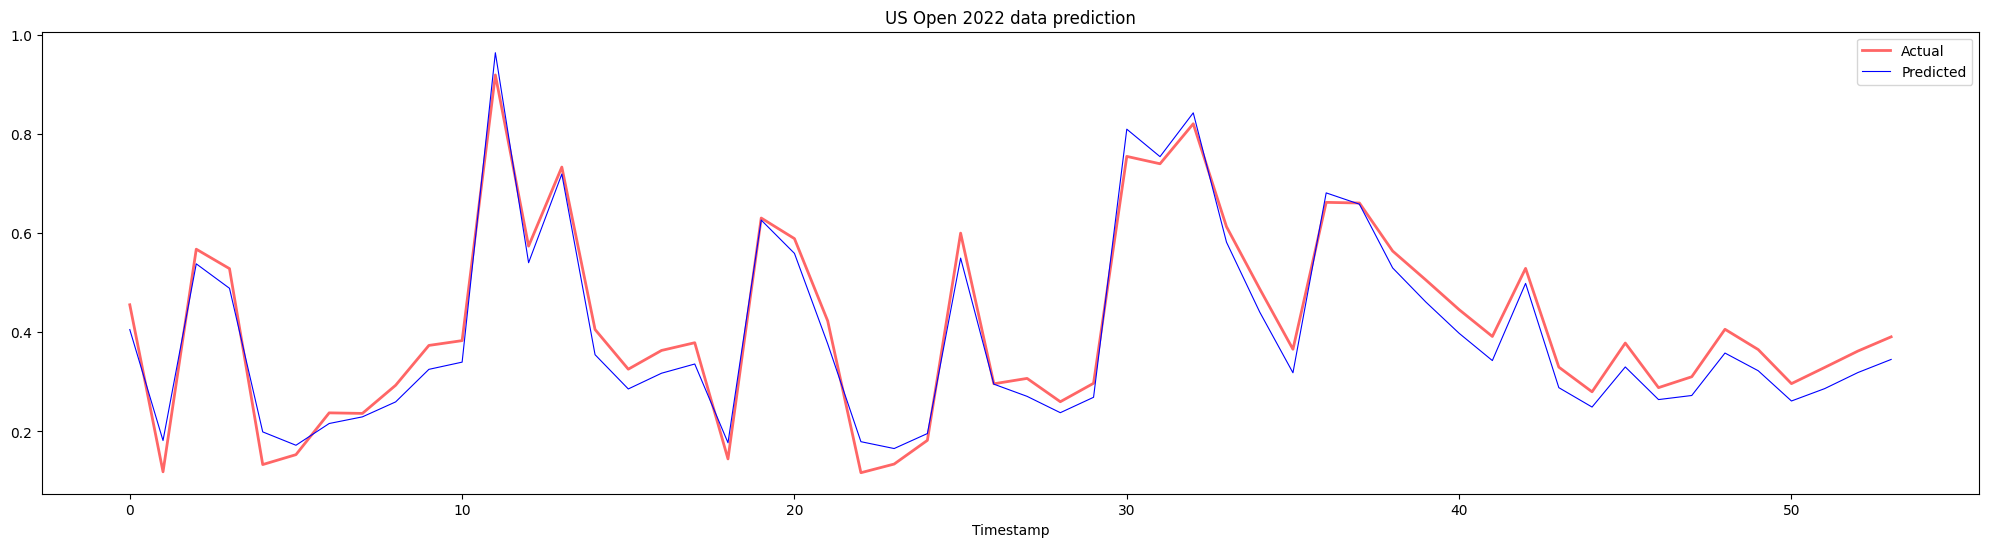

In [260]:
us_open_2022_count = list(us_open_2022["COUNT"])
us_open_2022_data = mets_station_scaler.transform([us_open_2022_count[i:i + time_interval] for i in range(len(us_open_2022_count) - time_interval + 1)])
us_open_2022_data_x, us_open_2022_data_y = us_open_2022_data[:, :-1], us_open_2022_data[:, [-1]]
us_open_2022_data_pred = model.predict(us_open_2022_data_x).reshape(-1,1)
print(mean_absolute_percentage_error(us_open_2022_data_pred, us_open_2022_data_y))
plt.figure(figsize=(25,6))
plt.plot(range(len(us_open_2022_data_x)), us_open_2022_data_y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(us_open_2022_data_x)), us_open_2022_data_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("US Open 2022 data prediction")
plt.show()

In [205]:
mets_station_scaler.get_params()

{'copy': True, 'norm': 'l2'}